('지금', 71)
('본인', 69)
('저희', 68)
('확인', 64)
('말씀', 63)
('사건', 60)
('연락', 59)
('명의', 58)
('통장', 57)
('가지', 56)
('혹시', 55)
('때문', 53)
('드릴', 52)
('사람', 52)
('전화', 51)
('조사', 51)
('진행', 49)
('금융', 48)
('일단', 48)
('현재', 48)
('피해자', 45)
('계좌', 44)
('검거', 44)
('고요', 44)
('사관', 44)
('대해', 44)
('네네', 43)
('전혀', 42)
('피해', 42)
('이제', 41)
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
76
69
90.79%


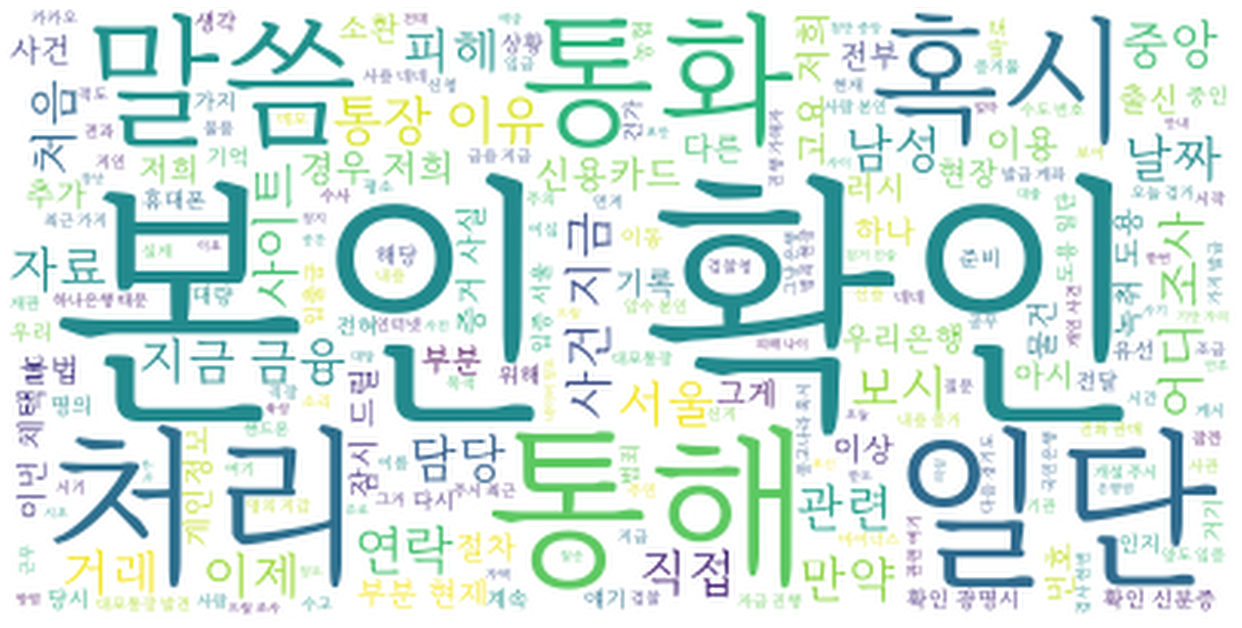

In [26]:
from konlpy.tag import Okt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_temp = []

# 피싱 대화 데이터 가져오기
path = '../fraudDataset/spamData/'
path1 = os.listdir(path)
for a in path1:
    path2 = path+a
    with open(path2, 'r', encoding='utf-8') as f:
        contents = f.read()
        spam_temp.append(contents)
        
okt = Okt()
        
stopWords = ['','','']
result = []
for text in spam_temp:        
    noun = okt.nouns(text) # 명사만 추출
    noun = list(set(noun))
    
    for v in noun[:]:
        if len(v)<2:
            noun.remove(v) # 한글자 명사 제거
    
    # 불용어 처리
    for n in noun:
        if n not in stopWords:
            result.append(n)


count = Counter(result) # 각 단어 별 count 설정

noun_list = count.most_common(30) # 빈도가 높은 n개의 명사 추출

for v in noun_list:
    print(v)
    
text_bool = []
for text in spam_temp:        
    noun = okt.nouns(text) # 명사만 추출
    for v in noun[:]:
        if len(v)<2:
            noun.remove(v) # 한글자 명사 제거

    # 불용어 처리
    for n in noun:
        if n not in stopWords:
            if n == '본인':
                boolean = 1
                break
            else:
                boolean = 0
    text_bool.append(boolean)
    
print(text_bool)
text_len = len(text_bool)
count = text_bool.count(1)
print(text_len)
print(count)
result1 = 0.0
result1 = (count / text_len)*100
print("{:.2f}%".format(result1))


noun_text = ''
for n in result:
    noun_text = noun_text+' '+n

wordcloud = WordCloud(font_path='MaruBuri-Regular.ttf', background_color='white').generate(noun_text) # wordcloud 생성

plt.figure(figsize=(22,22)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show()